<a href="https://colab.research.google.com/github/iotanalytics/IoTTutorial/blob/main/code/clustering_and_classification/AdaBoost_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **AdaBoost, Random Forests, & XGBoost**

**Tree-based ensemble algorithms**
Ensemble algorithms and particularly those that utilize decision trees as weak learners have multiple advantages compared to other algorithms (based on this paper, this one and this one):
1.  Their algorithms are easy to understand and visualize: describing and sketching a decision tree is arguably easier than describing Support Vector Machines to your grandma
2.  They are non-parametric and don’t assume or require the data to follow a particular distribution: this will save you time transforming data to be normally distributed
3.  They can handle mixed data types: categorical variables do not necessarily have to be one hot encoded
4.  Multi-collinearity of features does not affect the accuracy and prediction performance of the model: features do not need to be removed or otherwise engineered to decrease the correlations and interactions between them
5.  They are robust against overfitting: because they use many weak learners that underfit (high bias) and combine those predictions into a stronger learner, they reduce the overfitting (variance) of the model
6.  They are relatively robust against outliers and noise: in general, they will handle noisy data (e.g. features with no effect on the target) or outliers (e.g. extreme values) well with little effect on the overall performance (this point is debated for AdaBoost; more on that below)
7.  Inputs do not need to be scaled: preprocessing and transforming the features with MinMaxScaler or StandardScaler are not necessary
8.  They are computationally relatively inexpensive: compared to algorithms such as Support Vector Machines or neural networks they are faster
9.  They usually perform much better than their weak learners: decision trees will be less accurate due to their high variance/overfitting compared with boosting and bagging algorithms

### **Boosting & Bagging:**
"The concepts of boosting and bagging are central to understanding these tree-based ensemble models. **Boosting** describes the combination of many weak learners into one very accurate prediction algorithm. A weak learner refers to a learning algorithm that only predicts slightly better than randomly. When looking at tree-based ensemble algorithms a single decision tree would be the weak learner and the combination of multiple of these would result in the AdaBoost algorithm, for example. The boosting approach is a sequential algorithm that makes predictions for T rounds on the entire training sample and iteratively improves the performance of the boosting algorithm with the information from the prior round’s prediction accuracy (see this paper and this Medium blog post for further details)." [1]

"**Bagging** on the other hand refers to non-sequential learning. For T rounds, a random subset of samples is drawn (with replacement) from the training sample. Each of these draws are independent of the previous round’s draw but have the same distribution. These randomly selected samples are then used to grow a decision tree (weak learner). The most popular class (or average prediction value in case of regression problems) is then chosen as the final prediction value. The bagging approach is also called bootstrapping (see this and this paper for more details)." [1]

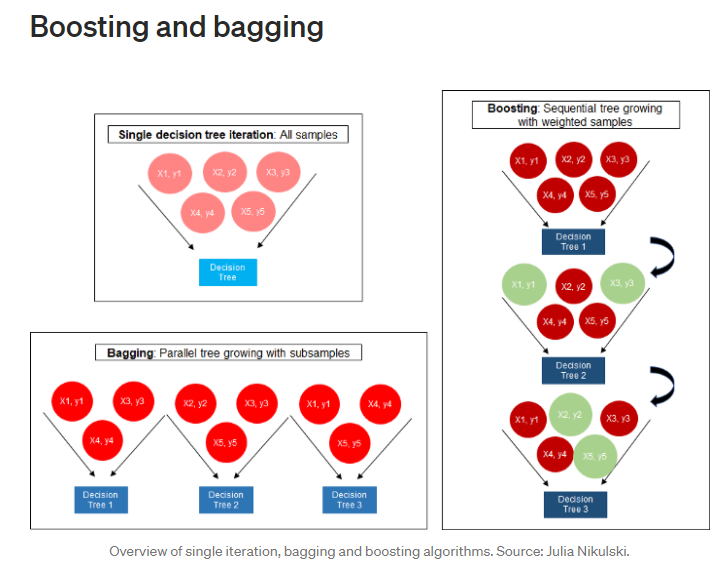

## **AdaBoost**
The AdaBoost algorithm is part of the family of boosting algorithms and was first introduced by Freund & Schapire in 1996. It is sequentially growing decision trees as weak learners and punishing incorrectly predicted samples by assigning a larger weight to them after each round of prediction. This way, the algorithm is learning from previous mistakes. The final prediction is the weighted majority vote (or weighted median in case of regression problems).
The pseudo code of the AdaBoost algorithm for a classification problem is shown below adapted from Freund & Schapire in 1996 (for regression problems, please refer to the underlying paper):

**For t in T rounds:** [1]
1.  Calculate distribution p by normalizing the weight vector w (the initial weights in w for the first round are 1/N, where N represents the number of labeled examples)
2.  Grow a weak learner (decision tree) using the distribution p; return hypothesis h with prediction values for each example
3.  Calculate error term ε of h
4.  Assign β with ε/(1- ε)
5.  Update the weight vector to w = w*β so that predictions with poor performance will have higher a weight and predictions with better performance will have a lower weight
**Output:** final hypothesis is the result of a weighted majority vote of all T weak learners

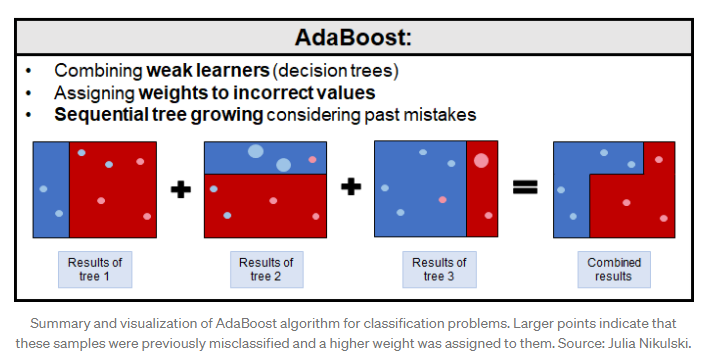

**Pros:** [1]
1.  AdaBoost is relatively robust to overfitting in low noise datasets (refer to Rätsch et al. (2001)).
2.  AdaBoost has only a few hyperparameters that need to be tuned to improve model performance.
3.  Moreover, this algorithm is easy to understand and to visualize.

**Cons:** [1]
1.  For noisy data the performance of AdaBoost is debated with some arguing that it generalizes well, while others show that noisy data leads to poor performance due to the algorithm spending too much time on learning extreme cases and skewing results.
2.  Compared to random forests and XGBoost, AdaBoost performs worse when irrelevant features are included in the model as shown by my time series analysis of bike sharing demand.
3.  AdaBoost is not optimized for speed, therefore being significantly slower than XGBoost.

"The relevant hyperparameters to tune are limited to the maximum depth of the weak learners/decision trees, the learning rate and the number of iterations/rounds. The learning rate balances the influence of each decision tree on the overall algorithm, while the maximum depth ensures that samples are not memorized, but that the model will generalize well with new data.
The above information shows that AdaBoost is best used in a dataset with low noise, when computational complexity or timeliness of results is not a main concern and when there are not enough resources for broader hyperparameter tuning due to lack of time and knowledge of the user." [1]

###**Random forests**
The random forests algorithm was developed by Breiman in 2001 and is based on the bagging approach. This algorithm is bootstrapping the data by randomly choosing subsamples for each iteration of growing trees. The growing happens in parallel which is a key difference between AdaBoost and random forests. Random forests achieve a reduction in overfitting by combining many weak learners that underfit because they only utilize a subset of all training samples. Another difference between AdaBoost and random forests is that the latter chooses only a random subset of features to be included in each tree, while the former includes all features for all trees.

The pseudo code for random forests is shown below according to Parmer et al. (2014):

For t in T rounds (with T being the number of trees grown):
1.  Draw a random sample s with replacement from the training set
2.  Repeat the following steps recursively until the tree’s prediction does not further improve:</br>
    2.1.  Randomly choose f number of features from all available features F</br>
    2.2.  Choose the feature with the most information gain</br>
    2.3.  This feature is used to split the current node of the tree on</br>

**Output:** majority voting of all T trees decides on the final prediction results

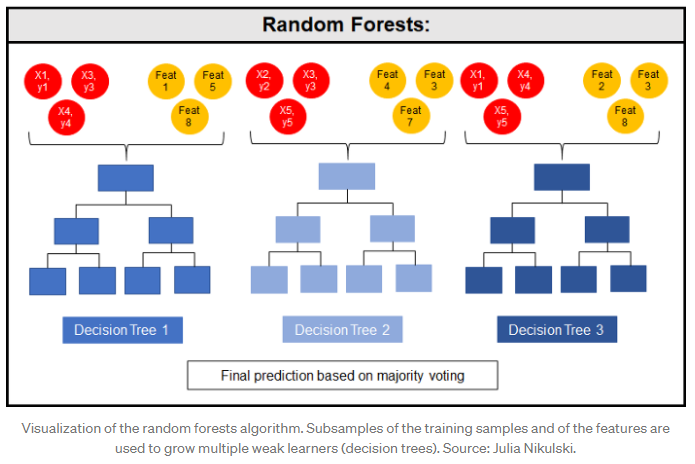

"Random forests is such a popular algorithm because it is highly accurate, relatively robust against noise and outliers, it is fast, can do implicit feature selection and is simple to implement and to understand and visualize (more details here). The main advantages of random forests over AdaBoost are that it is less affected by noise and it generalizes better reducing variance because the generalization error reaches a limit with an increasing number of trees being grown (according to the Central Limit Theorem). However, a disadvantage of random forests is that there is more hyperparameter tuning necessary because of a higher number of relevant parameters. Moreover, random forests introduce randomness into the training and testing data which is not suitable for all data sets (see below for more details). [1]

"The hyperparameters to consider include the number of features, number of trees, maximum depth of trees, whether to bootstrap samples, the minimum number of samples left in a node before a split and the minimum number of samples left in the final leaf node (based on this, this and this paper). In general, too much complexity in the training phase will lead to overfitting. Therefore, a lower number of features should be chosen (around one third). A larger number of trees tends to yield better performances while the maximum depth as well as the minimum number of samples per leaf before splitting should be relatively low. [1]

"Random forests **should not be used** when dealing with time series data or any other data where look-ahead bias should be avoided and the order and continuity of the samples need to be ensured (refer to my TDS post regarding time series analysis with AdaBoost, random forests and XGBoost). This algorithm can handle noise relatively well, but more knowledge from the user is required to adequately tune the algorithm compared to AdaBoost." [1]

**XGBoost**
"XGBoost (e**X**treme **G**radient **B**oosting) is a relatively new algorithm that was introduced by Chen & Guestrin in 2016 and is utilizing the concept of gradient tree boosting. XGBoost was developed to increase speed and performance, while introducing regularization parameters to reduce overfitting. Gradient boosted trees use regression trees (or CART) in a sequential learning process as weak learners. These regression trees are similar to decision trees, however, they use a continuous score assigned to each leaf (i.e. the last node once the tree has finished growing) which is summed up and provides the final prediction. For each iteration i which grows a tree t, scores w are calculated which predict a certain outcome y. The learning process aims to minimize the overall score which is composed of the loss function at i-1 and the new tree structure of t. This allows the algorithm to sequentially grow the trees and learn from previous iterations. Gradient descent is then used to compute the optimal values for each leaf and the overall score of tree t. The score is also called the impurity of the predictions of a tree." [1]

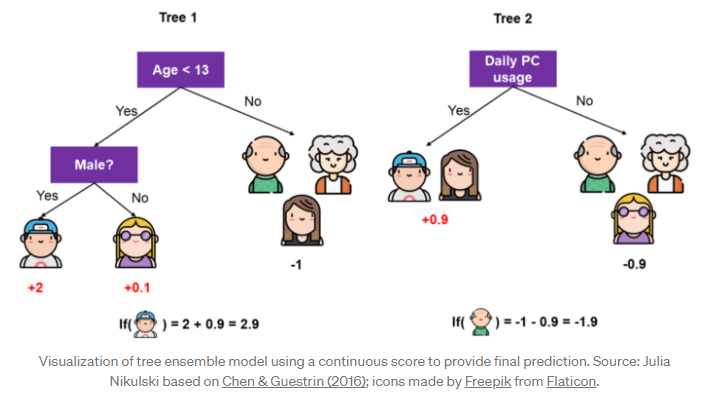

"The loss function in the above algorithm contains a regularization or penalty term Ω whose goal it is to reduce the complexity of the regression tree functions. This parameter can be tuned and can take values equal or greater than 0. If it is set to 0, then there is no difference between the prediction results of gradient boosted trees and XGBoost. In addition, Chen & Guestrin introduce shrinkage (i.e. a learning rate) and column subsampling (randomly selecting a subset of features) to this gradient tree boosting algorithm which allows further reduction of overfitting. It therefore adds the methods to handle overfitting introduced in AdaBoost (the learning rate) and random forests (column or feature subsampling) to the regularization parameter found in stochastic gradient descent models." [1]

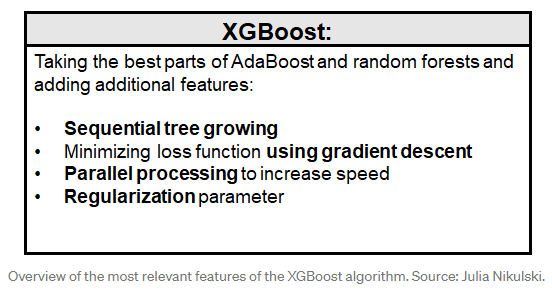

**Pros** [1]
1.  The main advantages of XGBoost is its lightning speed compared to other algorithms, such as AdaBoost, and its regularization parameter that successfully reduces variance.
2.  But even aside from the regularization parameter, this algorithm leverages a learning rate (shrinkage) and subsamples from the features like random forests, which increases its ability to generalize even further.

**Cons** [1]
1.  XGBoost is more difficult to understand, visualize and to tune compared to AdaBoost and random forests.
2.  There is a multitude of hyperparameters that can be tuned to increase performance.

"To name a few of the relevant hyperparameters: the learning rate, column subsampling and regularization rate were already mentioned. Additionally, subsample (which is bootstrapping the training sample), maximum depth of trees, minimum weights in child notes for splitting and number of estimators (trees) are also frequently used to address the bias-variance-trade-off. While higher values for the number of estimators, regularization and weights in child notes are associated with decreased overfitting, the learning rate, maximum depth, subsampling and column subsampling need to have lower values to achieve reduced overfitting. Yet, extreme values will lead to underfitting of the model.
XGBoost is a particularly interesting algorithm when speed as well as high accuracies are of the essence. Nevertheless, more resources in training the model are required because the model tuning needs more time and expertise from the user to achieve meaningful outcomes." [1]

**References:**
1.  https://towardsdatascience.com/the-ultimate-guide-to-adaboost-random-forests-and-xgboost-7f9327061c4f
2.  https://towardsdatascience.com/machine-learning-part-17-boosting-algorithms-adaboost-in-python-d00faac6c464
3.   https://www.kaggle.com/furiousx7/xgboost-time-series

In [1]:
# Run this to clone the ai engine to colab
!git clone https://github.com/sjc230/ai_engine.git

fatal: destination path 'ai_engine' already exists and is not an empty directory.


In [11]:
# Run this only if you need to pull updated file from the github repository
# to pull, the colab directory must be changed to the ai engine directeroy
# after pulling, you must switch back to the original directory
%cd ai_engine
!git pull
%cd ..

[Errno 2] No such file or directory: 'ai_engine'
/content/ai_engine
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 3 (delta 2), reused 3 (delta 2), pack-reused 0
Unpacking objects: 100% (3/3), 293 bytes | 24.00 KiB/s, done.
From https://github.com/sjc230/ai_engine
   f4c414e..acefa85  main       -> origin/main
Updating f4c414e..acefa85
Fast-forward
 sk_classifier_builder.py | 2 +-
 1 file changed, 1 insertion(+), 1 deletion(-)
/content


In [12]:
!pip install sktime
!pip install chart_studio
!python -m pip install tslearn

In [13]:
from math import radians
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
from pathlib import Path

#import streamlit as st

import re
import pytz
from datetime import datetime
from datetime import date

import enum
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, RocCurveDisplay, auc, roc_curve, roc_auc_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

In [14]:
# GET TIME SERIES DATASET
# steps 1, 2 - prepare osuleaf dataset (train and new)
from sktime.datasets import load_italy_power_demand

X_train, y_train = load_italy_power_demand(split="train", return_type="numpy2D")
X_test, y_test = load_italy_power_demand(split="test", return_type="numpy2D")

print("shape of X_train ",X_train.shape)
print("shape of y_train ",y_train.shape)
print("shape of X_test ",X_test.shape)
print("shape of y_test ",y_test.shape)

y_train = y_train.astype(int)
y_test = y_test.astype(int)

n_classes = int(np.amax(y_train))
print("number of classes is ",n_classes)

shape of X_train  (67, 24)
shape of y_train  (67,)
shape of X_test  (1029, 24)
shape of y_test  (1029,)
number of classes is  2


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameter (CV score=-0.044):
{'ada__estimator': DecisionTreeClassifier(), 'ada__learning_rate': 1.0, 'ada__n_estimators': 50}
              precision    recall  f1-score   support

           1       0.98      0.92      0.95       513
           2       0.92      0.98      0.95       516

    accuracy                           0.95      1029
   macro avg       0.95      0.95      0.95      1029
weighted avg       0.95      0.95      0.95      1029



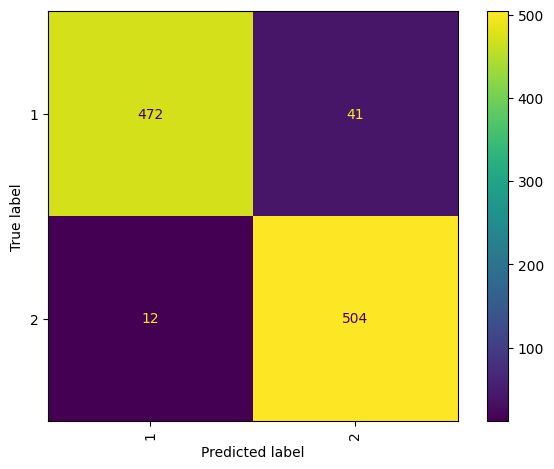

In [16]:
# SETUP & RUN ADABOOST GRIDSEARCH TRAINING & TESTING

# import the classifier builder from the cloned python files
import ai_engine.sk_classifier_builder as skc

ada = skc.pipeBuild_AdaBoostClassifier(estimator=[DecisionTreeClassifier()],n_estimators=[50],learning_rate=[1.0])

names=['AdaBoost']
pipes=[ada]


samples = np.arange(len(X_train[0,:]))

# iterate over classifiers
for j in range(len(names)):

    today = date.today()
    now = today.strftime("%b-%d-%Y")
    save_file = str(names[j]) + '-' + str(now) + '-HeatMap.png'

    grid_search = GridSearchCV(estimator=pipes[j][0], param_grid=pipes[j][1], scoring='neg_mean_squared_error',cv=5, verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    score = grid_search.score(X_test, y_test)
    print("Best parameter (CV score=%0.3f):" % grid_search.best_score_)
    print(grid_search.best_params_)
    y_pred = grid_search.predict(X_test)
    print(classification_report(y_test, y_pred))
    ConfusionMatrixDisplay.from_estimator(grid_search, X_test, y_test, xticks_rotation="vertical")

plt.tight_layout()
plt.show()